# FIR Filter and Redesign Figures

In [1]:
% matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neo.io import NeuralynxIO
from scipy.signal import medfilt, iirfilter
from scipy import signal

In [3]:
sessionfolder = 'C:\\Users\\Dowa\\Desktop\\Hiwi\\Single CSC File'

In [4]:
NIO = NeuralynxIO(sessiondir = sessionfolder, cachedir = sessionfolder)
block = NIO.read_block()
seg = block.segments[0]
analogsignal = seg.analogsignalarrays[0]
csc = analogsignal.magnitude

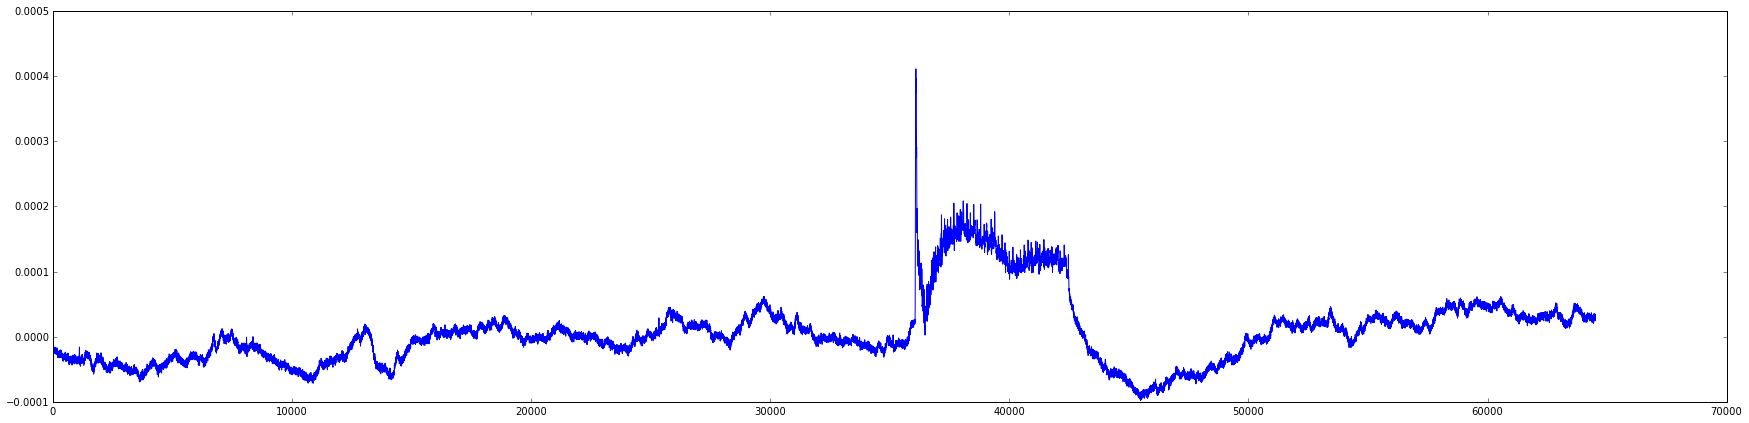

In [5]:
plt.figure(figsize=(30,7))
plt.plot(csc)

In [6]:
new_medfilt_data = medfilt(csc, 53)
new_medfilt_data = csc - new_medfilt_data

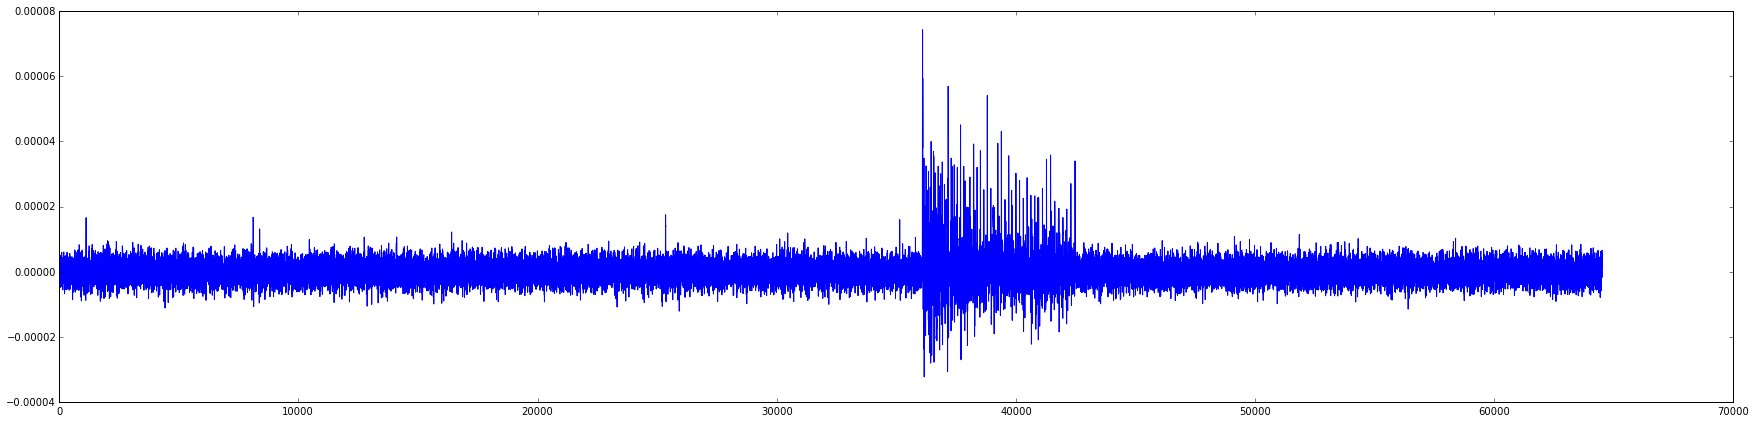

In [7]:
plt.figure(figsize=(30,7))
plt.plot(new_medfilt_data)

In [8]:
sample_rate = 32000
n_samples = len(csc)
nyq_rate = sample_rate / 2
# Quiroga: Unsupervised Spike Detection and Sorting with Wavelets and
# Superparamagnetic Clustering Bandpass from 300Hz to 6kHz
cutoff_low = 300.0/nyq_rate
cutoff_high = 6000.0 /nyq_rate
numtaps = 150
t = np.arange(n_samples) / sample_rate

In [9]:
fir_coeff = signal.firwin(numtaps,[cutoff_low,cutoff_high],pass_zero=False)

In [10]:
new_bandpass_filtered_data = signal.lfilter(fir_coeff, 1.0, csc)

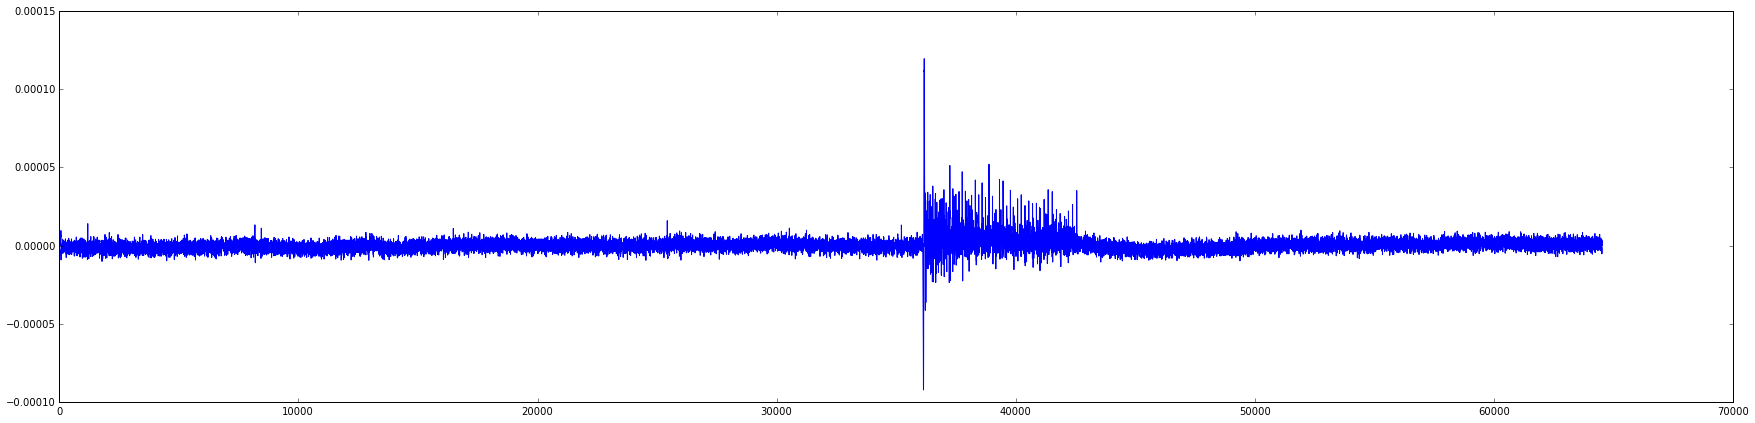

In [11]:
plt.figure(figsize=(30,7))
plt.plot(new_bandpass_filtered_data)

# Comparrison

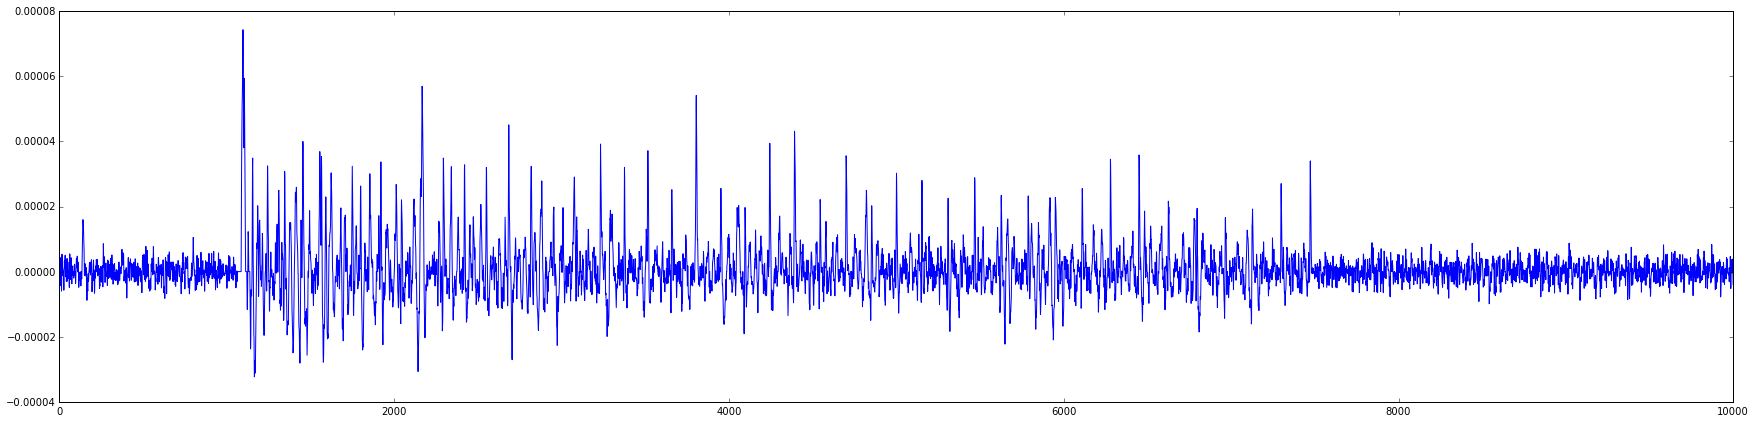

In [12]:
plt.figure(figsize=(30,7))
plt.plot(new_medfilt_data[35000:45000])

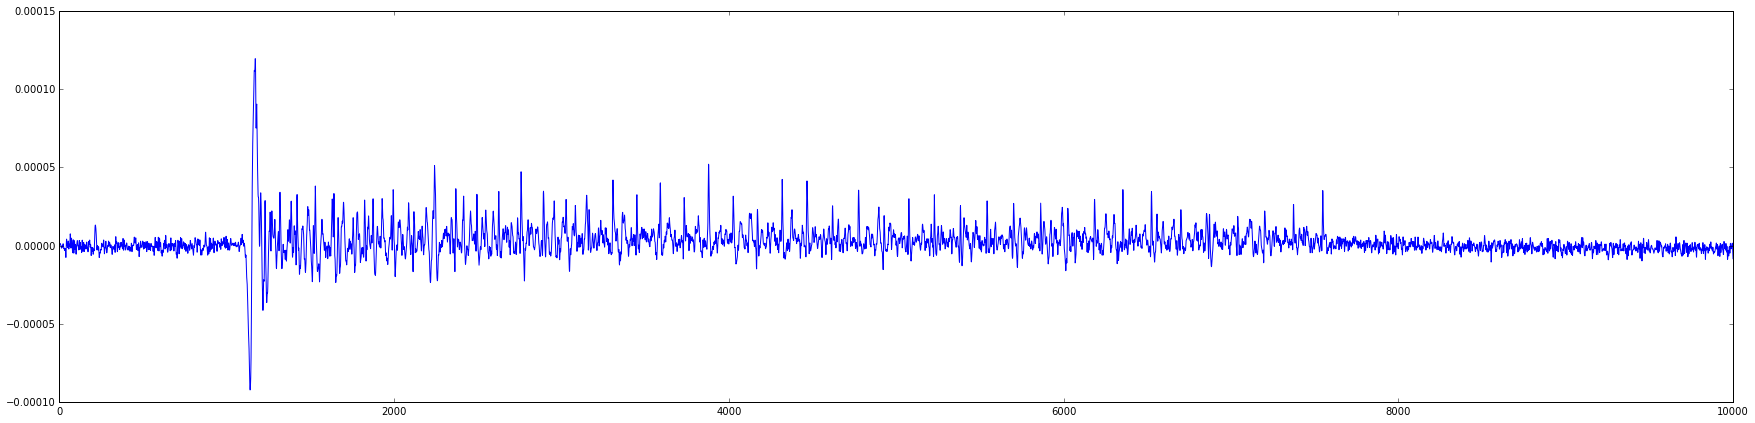

In [13]:
plt.figure(figsize=(30,7))
plt.plot(new_bandpass_filtered_data[35000:45000])

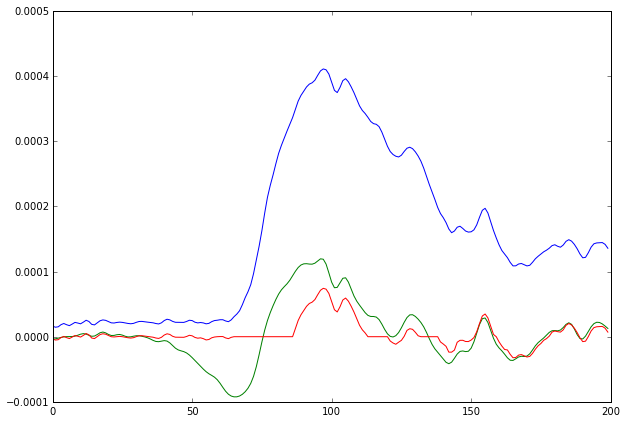

In [14]:
#Highpass filtered Signal is shifted by 75 samples.
plt.figure(figsize=(10,7))
plt.plot(csc[36000:36200])
plt.plot(new_bandpass_filtered_data[36075:36275], color = 'green')
plt.plot(new_medfilt_data[36000:36200], color = 'red')

# Highpass Filter

In [15]:
# highpass FIR filter
numtaps = 151
fir_coeff_highpass = signal.firwin(numtaps,300.0/nyq_rate, pass_zero=False)
new_highpass_filtered_data = signal.lfilter(fir_coeff_highpass, 1.0, csc)

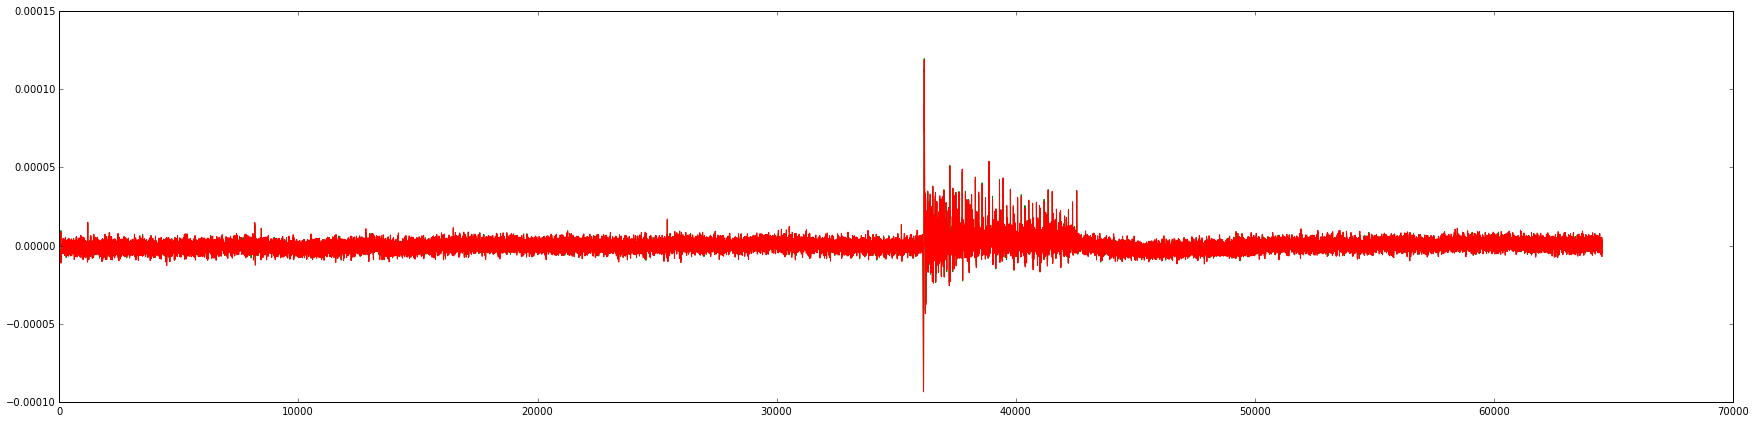

In [16]:
plt.figure(figsize=(30,7))
plt.plot(new_bandpass_filtered_data, color = 'green')
plt.plot(new_highpass_filtered_data, color = 'red')

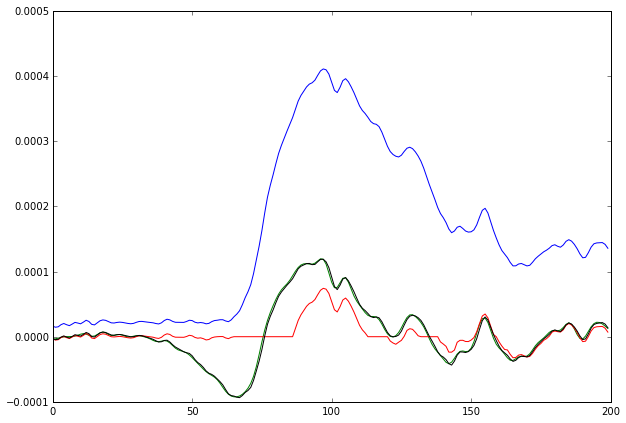

In [17]:
#Highpass filtered Signal is shifted by 75 samples.

plt.figure(figsize=(10,7))
plt.plot(csc[36000:36200])
plt.plot(new_bandpass_filtered_data[36075:36275], color = 'green')
plt.plot(new_medfilt_data[36000:36200], color = 'red')
plt.plot(new_highpass_filtered_data[36075:36275], color = "black")

No differences between High-pass and Band-pass filter. 

# Figure For Paper

In [18]:
from pylab import *
def parameters():
    params = {
   'axes.labelsize': 14,
   'text.fontsize': 8,
   'legend.fontsize': 15,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [20, 7]
   }
    rcParams.update(params)

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


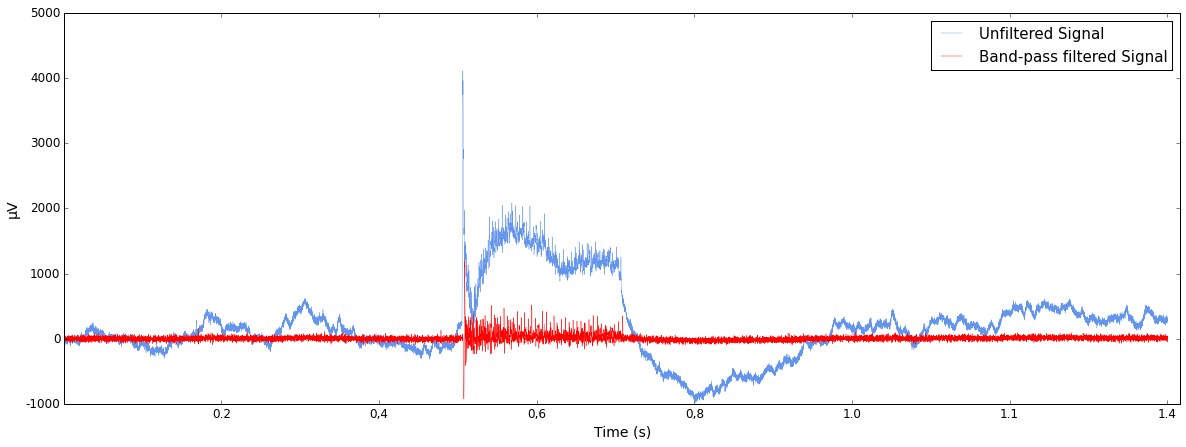

In [19]:
parameters()
plt.plot(csc[20000:], color = "cornflowerblue", linewidth = 0.4)
plt.plot(new_bandpass_filtered_data[20000:], color = 'red', linewidth = 0.4)

x = [6358, 12716, 19074, 25432, 31790, 38148, 44512]
labelsx = ["0.2", "0,4", "0,6", "0,8", "1.0", "1.1", "1.4" ]

y = [-0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
labelsy = ["-1000", "0", "1000", "2000", "3000", "4000", "5000"]

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)
legend = plt.legend(["Unfiltered Signal", "Band-pass filtered Signal"], loc=1)
plt.xlabel("Time (s)")
plt.ylabel(u"µV")
plt.savefig("Bandpassfilter", dpi = 600, format = "jpg")

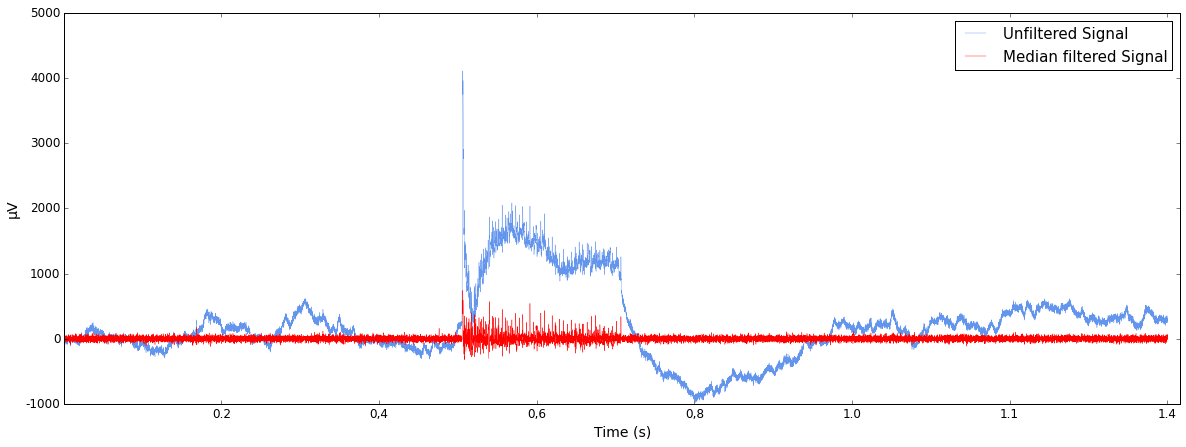

In [168]:
parameters()

plt.plot(csc[20000:], color = "cornflowerblue", linewidth = 0.4)
plt.plot(new_medfilt_data[20000:], color = 'red', linewidth = 0.4)

x = [6358, 12716, 19074, 25432, 31790, 38148, 44512]
labelsx = ["0.2", "0,4", "0,6", "0,8", "1.0", "1.1", "1.4" ]

y = [-0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
labelsy = ["-1000", "0", "1000", "2000", "3000", "4000", "5000"]

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)
legend = plt.legend(["Unfiltered Signal", "Median filtered Signal"], loc=1);
plt.xlabel("Time (s)")
plt.ylabel(u"µV")
plt.savefig("Medianfilter", dpi = 600, format = "jpg")

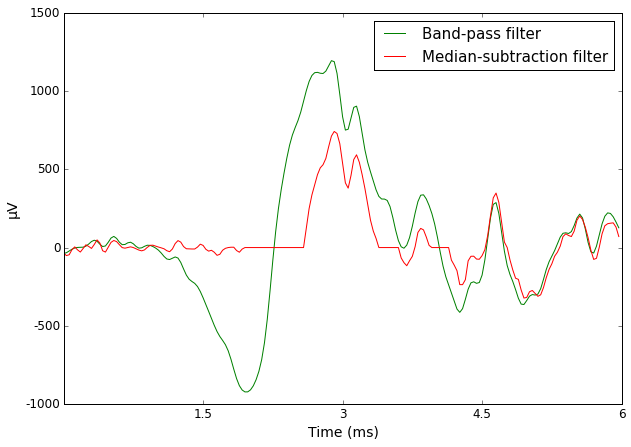

In [20]:
parameters()
plt.figure(figsize=(10,7))
x = [50, 100, 150, 200]
labelsx = ["1.5", "3", "4.5", "6"]

y = [-0.00010, -0.00005, 0, 0.00005, 0.00010, 0.00015]
labelsy = ["-1000", "-500", "0", "500", "1000", "1500"]

axes = plt.gca()
axes.set_xlim([0,200])
axes.set_ylim([0.0001,0.00015])

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)

plt.xlabel("Time (ms)")
plt.ylabel(u"µV")

plt.plot(new_bandpass_filtered_data[36075:36275], color = 'green')
plt.plot(new_medfilt_data[36000:36200], color = 'red')

legend = plt.legend(["Band-pass filter", "Median-subtraction filter"], loc=1);
plt.savefig("Comparrison", dpi = 600, format = "jpg")

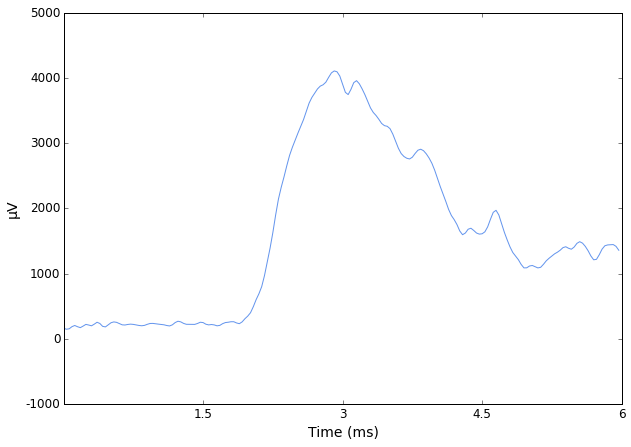

In [173]:
parameters()
plt.figure(figsize=(10,7))
plt.plot(csc[36000:36200], color = "cornflowerblue")

x = [50, 100, 150, 200]
labelsx = ["1.5", "3", "4.5", "6"]

y = [-0.0001, 0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
labelsy = ["-1000", "0", "1000", "2000", "3000", "4000", "5000"]

plt.xticks(x,labelsx)
plt.yticks(y,labelsy)


plt.xlabel("Time (ms)")
plt.ylabel(u"µV")

plt.savefig("Unfiltered Spike", dpi = 600, format = "jpg")